## Trabajo Semanal 2 - BETTIG
### Algoritmo para calcular la DFT

El objetivo de la tarea es desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT). Recordemos que la expresión de la misma es la siguiente: 

$$
X_k=\sum_{n=0}^{N−1} x_n.e^{−j2π.k.n/N}
$$

XX = mi_funcion_DFT( xx )

xx: señal a analizar, una matriz (Nx1) de números reales. 

XX: DFT de xx, una matriz (Nx1) de números complejos.

### Desarrollo del Trabajo

Lo primero que voy a hacer es realizar la función que me permita obtener la DFT, luego utilizaré la misma ara observar los resultados:

In [18]:
# Se importan las bibliotecas para realizar operaciones matemáticas 
# no standard (numpy) y la biblioteca que permite imprimir gráficos en 
# pantalla (matplotlib)
import numpy as np
import math
import matplotlib.pyplot as plt

In [9]:
# Creo la función que me permitirá obtener la DFT.
def my_dft(xx):
    # Lo primero que hago es obtener la cantidad de muestras que 
    # tiene mi función
    N = np.size(xx)
    # Creo el vector donde terminará almacenandose el resultado final
    dft_output = np.zeros(N,dtype=np.complex128)
    # Hago el doble lazo que me permite obtener la DFT. Hay que tener 
    # en cuenta que por cada BIN debo hacer la sumatoria de todas las
    # muestras afectadas por la base ortonormal
    for k in range(0, N):
        for n in range(0, N):
            # np.complex(real, imaginario)
            dft_output[k] += (xx[n] * np.exp(-2j*np.pi*k*n/(len(xx))))
    # Un dato importante es que el resultado está fuera de escala
    # Si se quisiera escalar al mismo, se debe devidir a cada uno de los 
    # elementos del vector por la cantidad de muestras (N en este caso)
    return dft_output

Una vez terminada la función, voy a poner a prueba la misma, para ello voy a utilizar el generador de funciones senoidales que realicé en la tarea semanal anterior.

In [11]:
def sin_gen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    # Lo primero que hay que hacer es crear un vector temporal que determinará
    # el inicio y el fin de la señal
    ts = 1/fs   # Tiempos de muestreo, intervalo de tiempo en el que se  
                # tomarán las muestras
    tf = N * ts # Tiempo final de la señal
    tt = np.arange(0, tf, ts) # Creo el vector temporal
    ##
    # Ahora tengo que generar mi señal senoidal, para eso voy a aprovechar
    # la función np.sin de la biblioteca numpy. Para ello, debemo evaluar
    # dicha función en cada uno de los puntos del vector temporal creado
    # previamente
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    ##
    # Devuelvo el vector temporal y el valor de la señal en cada uno de esos
    # puntos
    return tt, xx

Para verificar que el funcionamiento es el correcto, voy a comparar el resultado de mi función con lo que obtengo al utilizar la fft que tiene la biblioteca numpy. Voy a plotear en el primer gráfico cual esla función a la cual le quiero calcualar la DFT, luego el resultado de mi DFT, y por último la FFT de numpy

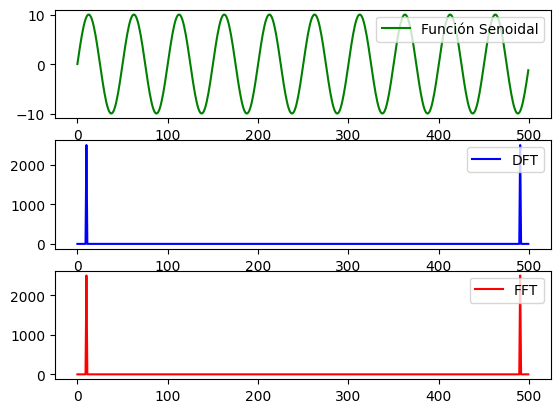

In [12]:
# Se definen la frecuencia de muestro y la cantidad de muestras. 
# En este caso tendremos estaremos trabajando de forma normalizada, por
# lo que N = fs

fs = 500     # Frecuencia de muestreo
N = fs      # Cantidad de muestras

fig1, (ax1, ax2, ax3) = plt.subplots(3);

# Lo primero que voy a hacer es generarme la señal senoidal 
# que utilizaré para probar mi DFT
# sin_gen(Amp, DC, Frec, Phase, Muestras, Fs)
t, y = sin_gen(10, 0, 10, 0, N, fs)
ax1.plot(y, color = 'green', label = 'Función Senoidal')
ax1.legend(loc = 'upper right');

# Calculo la DFT utilizando mi función, luego voy a plotearla en 
# recuadro superior del gráfico
XX = my_dft(y)
ax2.plot(np.abs(XX), color = 'blue', label = 'DFT')
ax2.legend(loc = 'upper right');

# A modo de verificación, voy a realizar la FFT que posee la biblioteca
# numpy e imprimir el resultado en el recuadro inferior
XX = np.fft.fft(y);
ax3.plot(np.abs(XX), color = 'red', label = 'FFT')
ax3.legend(loc = 'upper right');

Observemos que a partir de Fs/2 (En este caso Fs = 500) el gráfico tiene una simetría par, esto es debido a que la DFT se repetirá cada Fs/2, por lo que, si llevamos todo lo que está por encima de Fs/2 a banda base, corresponderá a la parte "negativa" del espectro, con Fs justo en el origen

Para la segunda parte de la Tarea, se plantea hacer la misma prueba pero utilizando una señal alaeatoria. Para ello, priemro generaré una función que me devuelva la secuencia de números aleatoria con distribución uniforme, mientras le indique cual es la varianza deseada y la cantidad de muestras

In [16]:
# Sabemos que la varianza de una función aleatoria con distribución
# uniforme puede ser calculada como Var(X) = q²/12
def rnd_nmbrs_gen(var, N):
    q = math.sqrt(var*12);
    rnd_numbers = q * np.random.random(N) - (q/2);
    return rnd_numbers;

Una vez hecho esto, debo correr a la misma y observar los resultados realizando al DFT y la FFT:

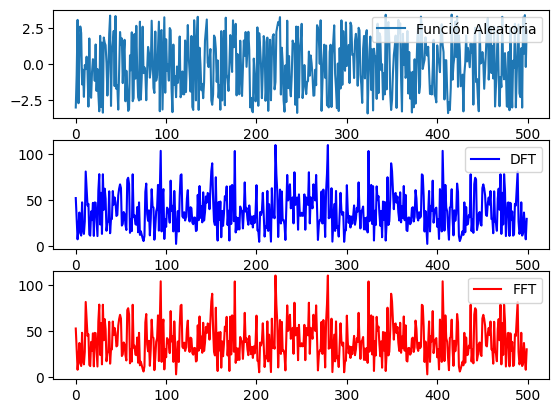

In [22]:
# Defino la varizanza que tendrá mi señal aleatoria
var = 4;
rnd_numbers = rnd_nmbrs_gen(var, N);

fig2, (ax1, ax2, ax3) = plt.subplots(3);
# Verifico haber obtenido la secuencia de números aleatorios
ax1.plot(rnd_numbers, label = 'Función Aleatoria');
ax1.legend(loc = 'upper right');

# Calculo la DFT utilizando mi función, luego voy a plotearla en 
# recuadro superior del gráfico
XX = my_dft(rnd_numbers)
ax2.plot(np.abs(XX), color = 'blue', label = 'DFT');
ax2.legend(loc = 'upper right');

# A modo de verificación, voy a realizar la FFT que posee la biblioteca
# numpy e imprimir el resultado en el recuadro inferior
XX = np.fft.fft(rnd_numbers);
ax3.plot(np.abs(XX), color = 'red', label = 'FFT')
ax3.legend(loc = 'upper right');